[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pinecone-io/examples/blob/master/learn/generation/langchain/rag-chatbot.ipynb) [![Open nbviewer](https://raw.githubusercontent.com/pinecone-io/examples/master/assets/nbviewer-shield.svg)](https://nbviewer.org/github/pinecone-io/examples/blob/master/learn/generation/langchain/rag-chatbot.ipynb)

# AssistantGpt🤖 powered by Aparavi Software
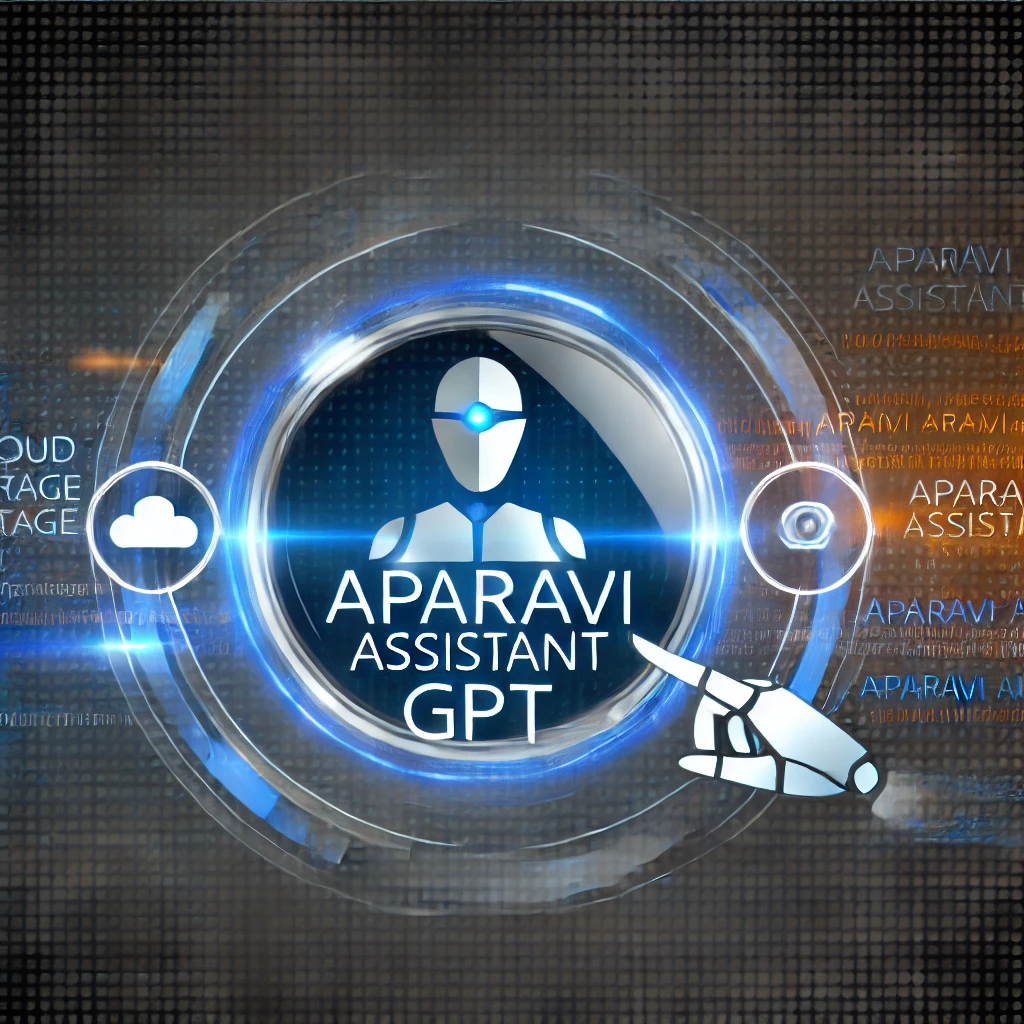

### Import Aparavi Package

Import the official Aparavi Retriever

In [ ]:
from langchain_community.retrievers import AparaviRagService

Connect to Public Search Endpioint

In [1]:

 # Setup use
userProfile = {
    'userId': 'XxsampleUserIdxX',
    'permissionId': 'XxsamplePermissionIdxX',
}

# user query
userQuery = {
    'query': 'Can I bring my pet velociraptor to the office?',
    'limit': 5, # Chosen number of most relevant text chunks to be returned 
}


# send it over to aparavi platform   
mostRelevantDocs = AparaviRagService.queryVectorDb( userProfile, userQuery )

### Process results (Example)

In [3]:
import torch    
torch.cuda.is_available()

True

In [ ]:
import os
from langchain.chat_models import ChatOpenAI

os.environ["OPENAI_API_KEY"] = "sk-..." 

# initialize OpenAi to return a good answer with the augmented prompt
chat = ChatOpenAI(
    openai_api_key=os.environ["OPENAI_API_KEY"],
    model='gpt-3.5-turbo'
)

# augment the user prompt with the knowledge retrieved from the vector DB
def augment_prompt(query: str):

    # feed into an augmented prompt
    augmented_prompt = f""" 

    Using the context below pleasse answer this query. 
        
    Contexts:
    {mostRelevantDocs.textChunks}

    Query: {query}"""
    return augmented_prompt

# initialize the chat 
systemMessages = [
    SystemMessage(content="You are a helpful assistant. Focus on the context provided."),
]

# add to message
message.append(systemMessate + [augment_prompt(userQuery['query'])])

# let the ChatGPT contextualize the relevant information to a readable response 
response = chat(message)
print(response.content)
